[*********************100%***********************]  1 of 1 completed

Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-07-28  117924.476562  119819.789062  117441.437500  119457.523438   
2025-07-29  117922.148438  119273.867188  116987.367188  117938.585938   
2025-07-30  117831.187500  118780.726562  115800.828125  117921.992188   
2025-07-31  115758.203125  118919.984375  115505.218750  117833.632812   
2025-08-01  113320.085938  116060.773438  112724.445312  115738.953125   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-07-28  64822943193  
2025-07-29  68463107433  
2025-07-30  68896148592  
2025-07-31  69370346018  
2025-08-01  91294530181  


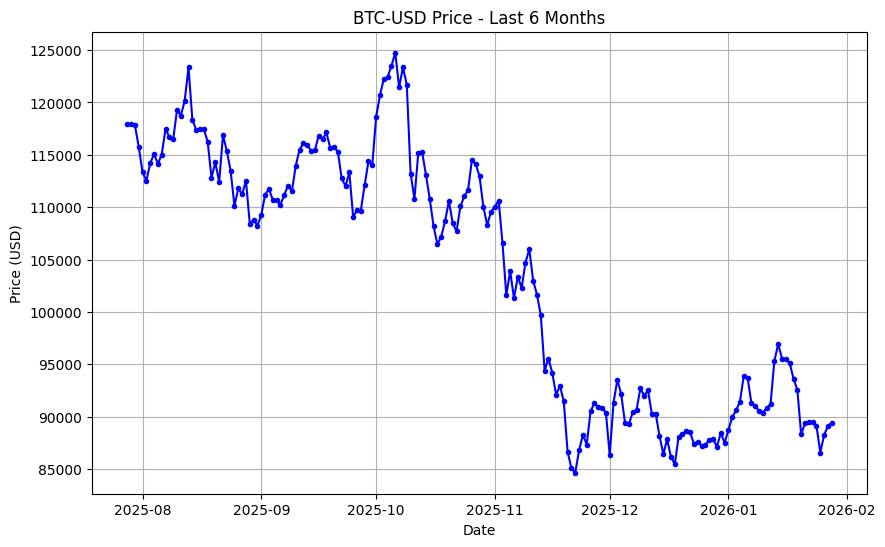

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# 1. データのダウンロード
ticker = "BTC-USD"
data = yf.download(ticker, period="6mo", interval="1d")

# 2. データの確認
print(data.head())

# 3. 終値の可視化
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], marker='.', color='b')
plt.title(f"{ticker} Price - Last 6 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import numpy as np

# 1. 前日の終値との差分（リターン）を計算
data['Return'] = data['Close'].pct_change()

# 2. 過去3日間の移動平均
data['MA3'] = data['Close'].rolling(window=3).mean()

# 3. ターゲット（ラベル）：翌日の終値が今日の終値より高ければ 1、低ければ 0
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# 4. 欠損値（NaN）を削除
df = data.dropna()

# 学習に使う項目（特徴量）と、予測したい項目（ターゲット）に分ける
X = df[['Return', 'MA3']]
y = df['Target']

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データを「学習用」と「テスト用」に分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# モデルの作成と学習
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 予測と精度の評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"予測精度 (Accuracy): {accuracy:.2%}")

予測精度 (Accuracy): 64.86%


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import datetime

# --- 1. データ取得 (Data Ingestion) ---
print("データを取得中...")
ticker = "BTC-USD"
# 過去2年分のデータを取得
data = yf.download(ticker, period="2y", interval="1d")

# --- 2. 前処理 (Preprocessing / Feature Engineering) ---
print("前処理を実行中...")
df = data.copy()
# 特徴量1: 終値の変化率
df['Return'] = df['Close'].pct_change()
# 特徴量2: 5日間の移動平均乖離率
df['MA5'] = df['Close'] / df['Close'].rolling(window=5).mean()
# ターゲット: 翌日の終値が今日より高ければ1 (上昇), そうでなければ0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# 欠損値（NaN）を削除して、必要な列だけ抽出
df = df.dropna()
features = ['Return', 'MA5']
X = df[features]
y = df['Target']

# --- 3. モデル学習 (Model Training) ---
print("モデルを学習中...")
# 時系列データなので shuffle=False (過去データで学習し、未来データでテスト)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 4. 評価 (Evaluation) ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"モデルの精度: {acc:.2%}")

# --- 5. モデル保存 (Model Storage) ---
model_filename = "btc_prediction_model.pkl"
joblib.dump(model, model_filename)
print(f"モデルを保存しました: {model_filename}")

# --- 6. 予測 (Inference / Prediction) ---
# 最新（今日）のデータを使って、明日を予測してみる
latest_data = X.tail(1)
prediction = model.predict(latest_data)
result = "上昇 🚀" if prediction[0] == 1 else "下落 📉"
print(f"【予測】明日のビットコイン価格予測は... {result} です！")

[*********************100%***********************]  1 of 1 completed

データを取得中...


前処理を実行中...
モデルを学習中...
モデルの精度: 47.26%
モデルを保存しました: btc_prediction_model.pkl
【予測】明日のビットコイン価格予測は... 下落 📉 です！
